# Exploratory Factor Analysis (EFA) Demonstration

This Google Colab notebook demonstrates core concepts in **Exploratory Factor Analysis (EFA)** using raw Likert-style survey data. This tutorial is adapted from an R-based Quarto demonstration and is designed for psychology graduate students learning how to evaluate and revise psychometric instruments.

We will use the `tidyverse` and `psych` packages to simulate a typical EFA workflow applied to real survey data.

## What You Will Learn

By the end of this tutorial, you will be able to:

- Import and inspect raw Likert-scale survey data
- Compute and interpret a correlation matrix among items
- Determine the number of latent factors using scree plots and parallel analysis
- Extract factors using different **factor extraction methods** (e.g., OLS, ML)
- Apply and interpret **factor rotation** techniques (orthogonal vs. oblique)
- Evaluate factor loadings, cross-loadings, and weak items for scale revision

## Required Packages

- `tidyverse`: for data handling and visualization  
- `psych`: for factor analysis functions (e.g., `fa`, `fa.parallel`)  


In [1]:
## Install the psych package
install.packages("psych")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’




In [7]:
## Load both packages
library(tidyverse)
library(psych)

## Load the data

In this section, you'll load the simulated dataset containing item-level responses. Each row represents one participant. Each column is a survey item, scored on a **1 to 7 Likert scale**.

In [12]:
## Load data
## Set the URL to Casey's GitHub page where the dataset is located
FileURL <- "https://raw.githubusercontent.com/CaseyGio/Psyc6263/refs/heads/main/Datasets/EFA%20Demonstration%20Data.csv"

## Read the csv file from GitHub and create a new object
EFAData <- read_csv(url(FileURL)) %>% select(starts_with("Item"))

## Check out the dataset
head(EFAData, n = 10)

New names:
• `` -> `...1`
Rows: 100 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (11): ...1, Item1, Item2, Item3, Item4, Item5, Item6, Item7, Item8, Item...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Item9,Item10
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,4,5,5,7,2,5,2,2,1
3,6,4,1,2,2,1,1,3,1
5,6,7,7,6,2,7,6,7,6
5,5,4,5,4,4,4,2,3,2
5,5,5,1,4,3,7,4,2,2
1,6,4,4,2,1,1,2,7,3
3,2,1,2,7,7,4,3,5,2
6,4,6,4,3,7,3,3,2,5
6,4,7,6,7,2,7,7,7,3


## Descriptive stats

Before we run factor analysis, it’s important to understand the **basic properties** of our data. In this section, you'll inspect:

- How each item is distributed (mean, SD, skew)
- How items relate to each other (inter-item correlations)

This helps ensure the data are suitable for EFA and may reveal early clues about factor structure.

In [13]:
## Calculate descriptive stats
describe(EFAData)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Item1,1,100,4,2.035046,4,4,2.9652,1,7,6,0,-1.305669,0.2035046
Item2,2,100,4,2.035046,4,4,2.9652,1,7,6,0,-1.305669,0.2035046
Item3,3,100,4,2.035046,4,4,2.9652,1,7,6,0,-1.305669,0.2035046
Item4,4,100,4,2.035046,4,4,2.9652,1,7,6,0,-1.305669,0.2035046
Item5,5,100,4,2.035046,4,4,2.9652,1,7,6,0,-1.305669,0.2035046
Item6,6,100,4,2.035046,4,4,2.9652,1,7,6,0,-1.305669,0.2035046
Item7,7,100,4,2.035046,4,4,2.9652,1,7,6,0,-1.305669,0.2035046
Item8,8,100,4,2.035046,4,4,2.9652,1,7,6,0,-1.305669,0.2035046
Item9,9,100,4,2.035046,4,4,2.9652,1,7,6,0,-1.305669,0.2035046


It is clear how fabricated these data are, eerily similar univariate (i.e., one-variable) statistics. This similarity is not true in the later multivariate statistics (e.g., correlation, factor analysis), however.  

In [17]:
## Save correlation matrix as object for later analyses
CorrData <-
  cor(EFAData)

## Show the correlation matrix
CorrData %>%
  round(2)

,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Item9,Item10
Item1,1.00,0.47,0.52,0.50,0.55,0.14,0.21,0.32,0.27,0.17
Item2,0.47,1.00,0.59,0.51,0.38,0.00,0.15,0.20,0.22,0.29
Item3,0.52,0.59,1.00,0.52,0.46,0.02,0.18,0.18,0.19,0.29
Item4,0.50,0.51,0.52,1.00,0.49,0.11,0.33,0.32,0.48,0.21
Item5,0.55,0.38,0.46,0.49,1.00,0.26,0.36,0.41,0.39,0.09
Item6,0.14,0.00,0.02,0.11,0.26,1.00,0.16,0.20,0.16,0.01
Item7,0.21,0.15,0.18,0.33,0.36,0.16,1.00,0.55,0.50,0.31
Item8,0.32,0.20,0.18,0.32,0.41,0.20,0.55,1.00,0.58,0.28
Item9,0.27,0.22,0.19,0.48,0.39,0.16,0.50,0.58,1.00,0.26
Item10,0.17,0.29,0.29,0.21,0.09,0.01,0.31,0.28,0.26,1.00


## Reliability

Before proceeding to factor analysis, it’s useful to assess the **internal consistency** of your item set. Cronbach’s alpha provides a basic index of how closely related a set of items are, assuming they all measure the same underlying construct.


In [16]:
## Calculate Cronbach's alpha
alpha(EFAData)


Reliability analysis   
Call: alpha(x = EFAData)

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean  sd median_r
      0.81      0.81    0.84      0.31 4.4 0.028    4 1.2     0.29

    95% confidence boundaries 
         lower alpha upper
Feldt     0.76  0.81  0.86
Duhachek  0.76  0.81  0.87

 Reliability if an item is dropped:
       raw_alpha std.alpha G6(smc) average_r S/N alpha se var.r med.r
Item1       0.79      0.79    0.82      0.29 3.8    0.031 0.027  0.28
Item2       0.80      0.80    0.82      0.30 3.9    0.030 0.026  0.28
Item3       0.79      0.79    0.81      0.30 3.9    0.031 0.025  0.28
Item4       0.78      0.78    0.81      0.29 3.6    0.033 0.027  0.26
Item5       0.78      0.78    0.81      0.29 3.6    0.032 0.028  0.26
Item6       0.83      0.83    0.85      0.35 4.9    0.026 0.021  0.33
Item7       0.80      0.80    0.82      0.31 4.0    0.030 0.029  0.28
Item8       0.79      0.79    0.81      0.30 3.8    0.031 0.029  0.28
Item9       0.79      0.79    0.81

The internal consistency data show no problems, standardized $\alpha$ is high and dropping any individual item will not increase our reliability. As far as our descriptive and reliability statistics are concerned, the scale looks pretty good. Let's proceed.

## Determining the number of factors to retain

Before extracting factors, we must decide how many underlying dimensions ("factors") are present in the data. Two commonly used techniques are:

- **Scree Plot**: Visual method for identifying the "elbow" or inflection point in eigenvalues.
- **Parallel Analysis**: Compares observed eigenvalues to those from randomly generated data to determine how many factors exceed chance levels.

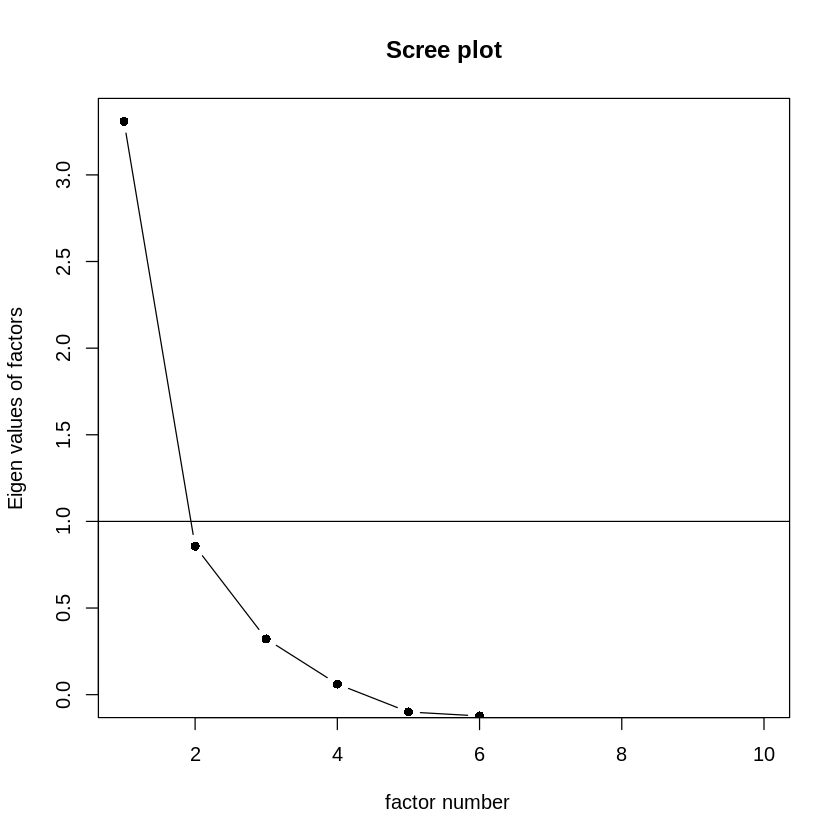

In [18]:
## Scree plot
scree(rx = CorrData,
      pc = FALSE)

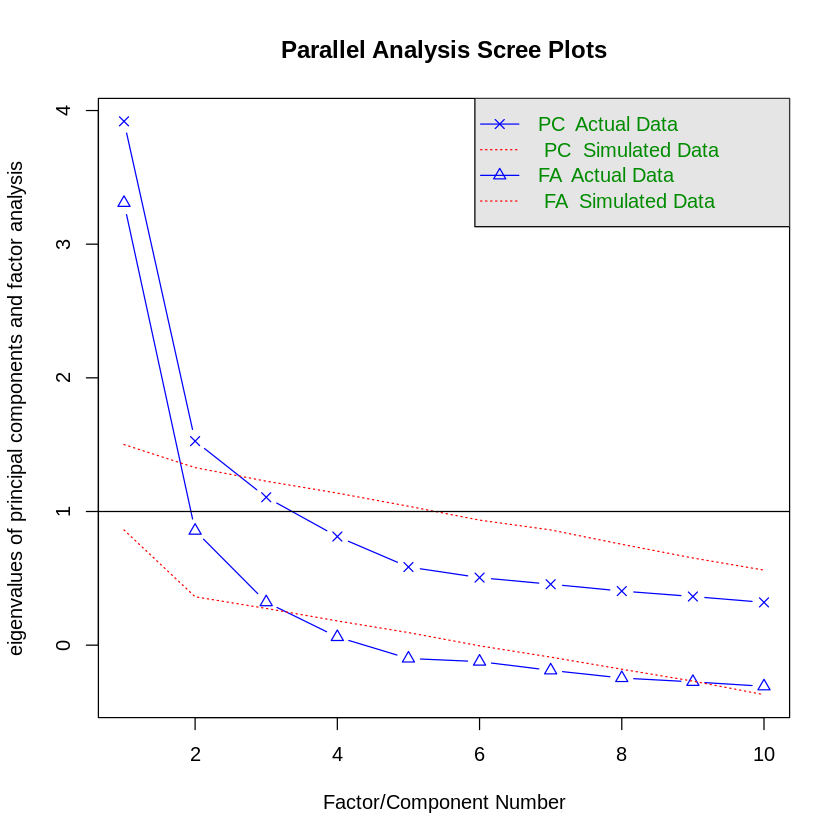

In [19]:
## Parallel analysis
fa.parallel(x     = CorrData,
            n.obs = 100)

### Interpretation

These data are tricky! The Scree plot is not very clear and the parallel analysis is very close to suggesting 2 or 3 factors. We will retain 2 factors here. The "FA Actual" and "FA Simulated" lines are virtually the same for 3 factors, suggesting that the third factor is about the same as we would expect in truly randomized data. This is more of an art than a science, we want parsimony and to reduce our data and having 3 factors with 10 items is not much parsimony. You *could* make a case for retaining 3 factors, however.

## Factor Extraction and Rotation

Once the number of factors is determined, we extract the factors and apply a **rotation** method to improve interpretability.

### Key Concepts:
- **Extraction Method**: We will use *Ordinary Least Squares* (`fm = "ols"`) but in other situations we may want to use Maximum Likelihood.
- **Rotation Method**: We will use *oblimin* rotation, which allows factors to correlate (common in psychological constructs).

In [25]:
## Extract and rotate our factor solutions
EFAOutput <-
  fa(r        = CorrData,
     nfactors = 2,
     rotate   = "oblimin",
     fm       = "ols")

## Show the factor loadings (factor pattern) matrix
EFAOutput$loadings[] %>%
  round(2)


Item1,0.64,0.12
Item2,0.75,-0.06
Item3,0.85,-0.11
Item4,0.59,0.26
Item5,0.47,0.33
Item6,-0.02,0.27
Item7,-0.03,0.71
Item8,-0.02,0.78
Item9,0.05,0.71
Item10,0.19,0.24


In [26]:
## Show the factor correlation (Phi) matrix
EFAOutput$Phi %>%
  round(2)

1.00,0.42
0.42,1.00


### Interpretation

**Factor pattern matrix**: We have some decent items here as far as they relate to the latent factors. However, there are some less-than-ideal ones, too.

Items 5, 6, and 10 have some issues that stand out.

Item 5 has (a) a low loading on the primary factor (loading = .47) but is mostly problematic because (b) it has a cross-loading on the secondary factor (loading = .33). The item is not a clear indicator of either factor and is somehow (at least partially) related to both factors, which is not ideal.

Items 6 and 10 both have low loadings on the primary factors (loadings = .27 and .24, respectively). The "primary factor" is merely the factor with the highest loading.

We might want to revise those items or even remove them from our scale. They have "good" descriptive statistics and do not negatively affect our reliability but they have lower construct validity in that they are not good representations of the focal constructs they were intended to measure.

**Factor correlation matrix**: This is easy, we have a decently large factor correlation ($\Phi$ = .42). This suggests we were correct in adopting an oblique rotation. Had this value been very low in absolute value (i.e., near zero), we may want to consider using an orthogonal rotation like Varimax.